In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [76]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('datasets\clean_data\energy_indicators.csv')
data.head()

,Date,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency,Renewable energy supply of total domestic net energy use,Share of renewable energy in net energy inputs,Government use of net domestic energy,Estimated resident population - Australia,Estimated number of households - Australia,Energy use (Net) - per person,Energy use (Net) - per household,Gas costs - per household,Petroleum costs - per household,Electricity costs - per household,Total energy costs - per household,Energy extracted (Net) - per household,Renewable energy extracted by households
0,2003,100.0,100.0,307.0,8.5,1.7,2.6,"19,720,737.0","7,264,723.0",55.7,151.3,0.0,0,0,0,6.3,45.9
1,2004,101.3,104.1,303.8,8.3,1.6,2.6,"19,932,722.0","7,396,137.0",56.6,152.6,0.0,0,0,0,6.0,44.2
2,2005,109.6,107.4,320.5,8.2,1.5,2.5,"20,176,844.0","7,526,410.0",55.8,149.7,0.0,0,0,0,5.7,42.7
3,2005,108.1,110.4,305.9,8.2,1.6,2.5,"20,450,966.0","7,656,969.0",55.7,148.7,0.0,0,0,0,5.4,41.2
4,2007,112.6,114.6,307.7,8.1,1.5,2.5,"20,827,622.0","7,803,641.0",55.1,147.1,0.0,0,0,0,5.6,43.5


In [77]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
data = pd.get_dummies(data)
data.head()
### END SOLUTION

,Date,Net energy use index,"GDP, Chain volume series - Index",Degree of self sufficiency,Renewable energy supply of total domestic net energy use,Share of renewable energy in net energy inputs,Government use of net domestic energy,Energy use (Net) - per person,Energy use (Net) - per household,Gas costs - per household,...,"Total energy costs - per household_4,123.5","Total energy costs - per household_4,188.9","Total energy costs - per household_4,671.2","Total energy costs - per household_4,681.0","Total energy costs - per household_4,852.3","Total energy costs - per household_4,933.3","Total energy costs - per household_4,942.8","Total energy costs - per household_5,115.8","Total energy costs - per household_5,268.6","Total energy costs - per household_5,357.4"
0,2003,100.0,100.0,307.0,8.5,1.7,2.6,55.7,151.3,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2004,101.3,104.1,303.8,8.3,1.6,2.6,56.6,152.6,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2005,109.6,107.4,320.5,8.2,1.5,2.5,55.8,149.7,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2005,108.1,110.4,305.9,8.2,1.6,2.5,55.7,148.7,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2007,112.6,114.6,307.7,8.1,1.5,2.5,55.1,147.1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = data[["Renewable energy supply of total domestic net energy use","Share of renewable energy in net energy inputsS"]]
y = data["Degree of self sufficiency"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

KeyError: "['Share of renewable energy in net energy inputsS'] not in index"

In [86]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [87]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [88]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [89]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

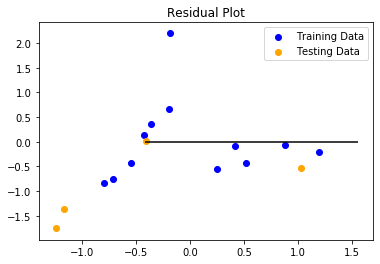

In [90]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [91]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.28706856203261, R2: -1.514919885060908
